# Evaluation

Steps:
1. Harmonize the predictions to have the same format
2. Extract the frequencies using a sliding window approach
3. Evaluate the performance of the models
4. Visualize the results

## Step 1: Harmonize the predictions

In [1]:
import numpy as np
import pandas as pd
import respiration.utils as utils

signals_dir = utils.dir_path('outputs', 'signals')

In [2]:
raft_file = utils.join_paths(signals_dir, 'raft_predictions.csv')
raft_predictions = pd.read_csv(raft_file)
raft_predictions['signal'] = raft_predictions['signal_v'].apply(eval).apply(np.array)

# Only keep the chest roi predictions
raft_predictions = raft_predictions[raft_predictions['roi'] == 'chest']

# Only keep the columns that are needed
raft_predictions = raft_predictions[['subject', 'setting', 'model', 'signal']]

raft_predictions.head()

,subject,setting,model,signal
1,Proband01,101_natural_lighting,raft_large,"[-0.046315472573041916, -0.08250490576028824, ..."
4,Proband01,101_natural_lighting,raft_small,"[-0.031725313514471054, -0.021138720214366913,..."
7,Proband02,101_natural_lighting,raft_large,"[0.004266717471182346, -0.023671478033065796, ..."
10,Proband02,101_natural_lighting,raft_small,"[-0.01642800122499466, 0.0195891335606575, 0.0..."
13,Proband03,101_natural_lighting,raft_large,"[0.0041928417049348354, -0.011556083336472511,..."


In [3]:
flownet_file = utils.join_paths(signals_dir, 'flownet_predictions.csv')
flownet_predictions = pd.read_csv(flownet_file)
flownet_predictions['signal'] = flownet_predictions['signal_v'].apply(eval).apply(np.array)

# Only keep the chest roi predictions
flownet_predictions = flownet_predictions[flownet_predictions['roi'] == 'chest']

# Only keep the columns that are needed
flownet_predictions = flownet_predictions[['subject', 'setting', 'model', 'signal']]

flownet_predictions.head()

,subject,setting,model,signal
1,Proband01,101_natural_lighting,FlowNet2,"[-0.00023249644436873496, -0.00023353847791440..."
4,Proband01,101_natural_lighting,FlowNet2C,"[-62.82395553588867, -62.83050537109375, -62.7..."
7,Proband01,101_natural_lighting,FlowNet2CS,"[-48.91574478149414, -48.912803649902344, -48...."
10,Proband01,101_natural_lighting,FlowNet2CSS,"[-31.059289932250977, -31.22064208984375, -31...."
13,Proband01,101_natural_lighting,FlowNet2S,"[-0.43838709592819214, -0.4331112504005432, -0..."


In [4]:
pretrained_file = utils.join_paths(signals_dir, 'pretrained_predictions.csv')
pretrained_predictions = pd.read_csv(pretrained_file)
pretrained_predictions['signal'] = pretrained_predictions['signal'].apply(eval).apply(np.array)

# Only keep the columns that are needed
pretrained_predictions = pretrained_predictions[['subject', 'setting', 'model', 'signal']]

pretrained_predictions.head()

,subject,setting,model,signal
0,Proband01,101_natural_lighting,mtts_can,"[0.5543686151504517, 0.4143042266368866, 0.193..."
1,Proband01,101_natural_lighting,big_small,"[-0.06490246951580048, -0.0634026825428009, -0..."
2,Proband02,101_natural_lighting,mtts_can,"[0.27873915433883667, -0.143912672996521, 0.35..."
3,Proband02,101_natural_lighting,big_small,"[-0.6646443009376526, -0.7338840365409851, -0...."
4,Proband03,101_natural_lighting,mtts_can,"[-0.07861271500587463, -0.34626856446266174, -..."


In [5]:
lucas_kanade_file = utils.join_paths(signals_dir, 'lucas_kanade.csv')
lucas_kanade = pd.read_csv(lucas_kanade_file)
lucas_kanade['signal'] = lucas_kanade['signal'].apply(eval).apply(np.array)

# Rename column method to model
lucas_kanade.rename(columns={'method': 'model'}, inplace=True)

# Remove all the rows that have a signal with a length of 0
lucas_kanade = lucas_kanade[lucas_kanade['grey'] == False]

# Only keep the columns that are needed
lucas_kanade = lucas_kanade[['subject', 'setting', 'model', 'signal']]

lucas_kanade.head()

,subject,setting,model,signal
0,Proband01,101_natural_lighting,lucas_kanade_cgof,"[566.1892881912896, 566.1583861238988, 566.090..."
1,Proband01,101_natural_lighting,lucas_kanade,"[569.9464284117253, 569.8949780022082, 569.838..."
4,Proband02,101_natural_lighting,lucas_kanade_cgof,"[575.59385902618, 575.574281238526, 575.574272..."
5,Proband02,101_natural_lighting,lucas_kanade,"[575.5011444858751, 575.4824881353312, 575.475..."
8,Proband03,101_natural_lighting,lucas_kanade_cgof,"[560.2775401023979, 560.277917737341, 560.2593..."


In [6]:
pixel_intensity_file = utils.join_paths(signals_dir, 'pixel_intensity.csv')
pixel_intensity = pd.read_csv(pixel_intensity_file)
pixel_intensity['signal'] = pixel_intensity['signal'].apply(eval).apply(np.array)

# Rename column method to model
pixel_intensity.rename(columns={'method': 'model'}, inplace=True)

# Only keep the columns that are needed
pixel_intensity = pixel_intensity[['subject', 'setting', 'model', 'signal']]

pixel_intensity.head()

,subject,setting,model,signal
0,Proband01,101_natural_lighting,pixel_intensity_rgb,"[147.73177944862155, 147.68380952380954, 147.7..."
1,Proband01,101_natural_lighting,pixel_intensity_grey,"[144.23864661654136, 144.1996992481203, 144.24..."
2,Proband02,101_natural_lighting,pixel_intensity_rgb,"[194.89094821602112, 194.8521449396085, 195.08..."
3,Proband02,101_natural_lighting,pixel_intensity_grey,"[192.59745939192004, 192.5506039150354, 192.77..."
4,Proband03,101_natural_lighting,pixel_intensity_rgb,"[31.049242424242426, 31.09947964493419, 32.294..."


In [7]:
r_ppg_path = utils.join_paths(signals_dir, 'r_ppg_predictions.csv')

r_ppg_prediction = pd.read_csv(r_ppg_path)
r_ppg_prediction['signal'] = r_ppg_prediction['signal'].apply(eval).apply(np.array)

# Only keep the columns that are needed
r_ppg_prediction = r_ppg_prediction[['subject', 'setting', 'model', 'signal']]
r_ppg_prediction.head()

,subject,setting,model,signal
0,Proband01,101_natural_lighting,BP4D_PseudoLabel_TSCAN,"[0.1003175675868988, 0.4112994968891144, 0.678..."
1,Proband01,101_natural_lighting,MA-UBFC_tscan,"[-0.5689785480499268, -0.3492545187473297, -0...."
2,Proband01,101_natural_lighting,PURE_TSCAN,"[0.2524776756763458, -0.23906010389328003, -0...."
3,Proband01,101_natural_lighting,SCAMPS_TSCAN,"[1.1077316999435425, 0.7577620148658752, -1.23..."
4,Proband01,101_natural_lighting,UBFC-rPPG_TSCAN,"[-0.0640445351600647, -0.2270553708076477, -0...."


In [8]:
transformer_path = utils.join_paths(signals_dir, 'transformer_predictions.csv')

transformer_prediction = pd.read_csv(transformer_path)
transformer_prediction['signal'] = transformer_prediction['signal'].apply(eval).apply(np.array)

# Add a tf_ prefix to the model names
transformer_prediction['model'] = 'tf_' + transformer_prediction['model']

# Only keep the columns that are needed
transformer_prediction = transformer_prediction[['subject', 'setting', 'model', 'signal']]
transformer_prediction.head()

,subject,setting,model,signal
0,Proband21,101_natural_lighting,tf_20240728_114332,"[80.26251220703125, 80.6565933227539, 83.67977..."
1,Proband22,101_natural_lighting,tf_20240728_114332,"[78.12396240234375, 75.29678344726562, 75.0180..."
2,Proband23,101_natural_lighting,tf_20240728_114332,"[70.64225006103516, 70.77820587158203, 69.4540..."
3,Proband24,101_natural_lighting,tf_20240728_114332,"[75.56920623779297, 75.68268585205078, 75.6368..."
4,Proband25,101_natural_lighting,tf_20240728_114332,"[81.59939575195312, 80.83991241455078, 81.3827..."


In [9]:
#
# The random signal is used as a baseline to see how well the models perform against a random predictions
#
random_path = utils.join_paths(signals_dir, 'random_predictions.csv')

random_prediction = pd.read_csv(random_path)
random_prediction['signal'] = random_prediction['signal'].apply(eval).apply(np.array)

# Only keep the columns that are needed
random_prediction = random_prediction[['subject', 'setting', 'model', 'signal']]
random_prediction.head()

,subject,setting,model,signal
0,Proband01,101_natural_lighting,random,"[0.3745401188473625, 0.9507143064099162, 0.731..."
1,Proband02,101_natural_lighting,random,"[0.14122354337314946, 0.5708774168394762, 0.18..."
2,Proband03,101_natural_lighting,random,"[0.36901773241117275, 0.13551687356075404, 0.5..."
3,Proband04,101_natural_lighting,random,"[0.35121701963848806, 0.8372399995154594, 0.06..."
4,Proband05,101_natural_lighting,random,"[0.0381536059353772, 0.42981769814138193, 0.06..."


In [10]:
rhythm_former_path = utils.join_paths(signals_dir, 'rhythm_former.csv')

rhythm_former = pd.read_csv(rhythm_former_path)
rhythm_former['signal'] = rhythm_former['signal'].apply(eval).apply(np.array)

# Only keep the columns that are needed
rhythm_former = rhythm_former[['subject', 'setting', 'model', 'signal']]
rhythm_former.head()

,subject,setting,model,signal
0,Proband01,101_natural_lighting,MMPD_intra_RhythmFormer,"[6.164031982421875, 2.4254937171936035, 0.3721..."
1,Proband02,101_natural_lighting,MMPD_intra_RhythmFormer,"[6.900549411773682, 5.6790008544921875, 7.2168..."
2,Proband03,101_natural_lighting,MMPD_intra_RhythmFormer,"[-0.09313610196113586, -0.4720010757446289, 4...."
3,Proband04,101_natural_lighting,MMPD_intra_RhythmFormer,"[2.1658482551574707, 1.7018548250198364, 5.791..."
4,Proband05,101_natural_lighting,MMPD_intra_RhythmFormer,"[6.738060474395752, 5.562791347503662, 7.24396..."


In [11]:
predictions = pd.concat([
    raft_predictions,
    flownet_predictions,
    pretrained_predictions,
    lucas_kanade,
    pixel_intensity,
    r_ppg_prediction,
    transformer_prediction,
    random_prediction,
    rhythm_former,
])
len(predictions)

812

In [12]:
# Show all models
predictions['model'].unique()

array(['raft_large', 'raft_small', 'FlowNet2', 'FlowNet2C', 'FlowNet2CS',
       'FlowNet2CSS', 'FlowNet2S', 'FlowNet2SD', 'mtts_can', 'big_small',
       'lucas_kanade_cgof', 'lucas_kanade', 'pixel_intensity_rgb',
       'pixel_intensity_grey', 'BP4D_PseudoLabel_TSCAN', 'MA-UBFC_tscan',
       'PURE_TSCAN', 'SCAMPS_TSCAN', 'UBFC-rPPG_TSCAN',
       'BP4D_PseudoLabel_DeepPhys', 'MA-UBFC_deepphys', 'PURE_DeepPhys',
       'SCAMPS_DeepPhys', 'UBFC-rPPG_DeepPhys', 'tf_20240728_114332',
       'tf_20240728_172805', 'tf_20240729_195756', 'tf_20240803_105616',
       'random', 'MMPD_intra_RhythmFormer', 'PURE_cross_RhythmFormer',
       'UBFC_cross_RhythmFormer', 'RF_20240726_104536',
       'RF_20240726_155024', 'RF_20240726_171101', 'RF_20240726_212436',
       'RF_20240727_170156', 'RF_20240731_113403', 'RF_20240801_124757',
       'RF_20240801_195728', 'RF_20240802_155121', 'RF_20240803_164403'],
      dtype=object)

## Step 2: Extract the frequencies using a sliding window approach

In [13]:
from respiration.dataset import VitalCamSet

dataset = VitalCamSet()

In [14]:
subject = 'Proband23'
setting = '101_natural_lighting'

In [15]:
sampling_rate = 30
lowpass = 0.1
highpass = 0.5

In [31]:
from respiration.analysis import (
    butterworth_filter,
    normalize_signal,
    detrend_tarvainen,
)

from scipy.signal import detrend

models = [
    # 'lucas_kanade',
    'RF_20240802_155121',
    # 'RF_20240726_104536',
    # 'raft_small',
    # 'pixel_intensity_grey',
    # 'tf_20240729_195756',
    # 'MMPD_intra_RhythmFormer',
    # 'mtts_can',
    # 'big_small',
]

signals = []

for model in models:
    prediction = predictions[
        (predictions['subject'] == subject) &
        (predictions['setting'] == setting) &
        (predictions['model'] == model)].iloc[0]['signal']
    
    print(f'{model}: {prediction.shape}')

    # Normalize the signals
    prediction = normalize_signal(prediction)

    # Filter the signals
    prediction = butterworth_filter(prediction, sampling_rate, lowpass, highpass)

    # Add the signals to the list
    signals.append({
        'label': model,
        'signal': prediction,
    })

RF_20240802_155121: (3456,)


In [32]:
# Get the ground truth signal
gt_signal = dataset.get_breathing_signal(subject, setting)
gt_signal = normalize_signal(gt_signal)
gt_signal = butterworth_filter(gt_signal, sampling_rate, lowpass, highpass)

peaks: 9.50 bpm
RF_20240802_155121: 11.46 bpm


/tmp/ipykernel_14280/1834859117.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


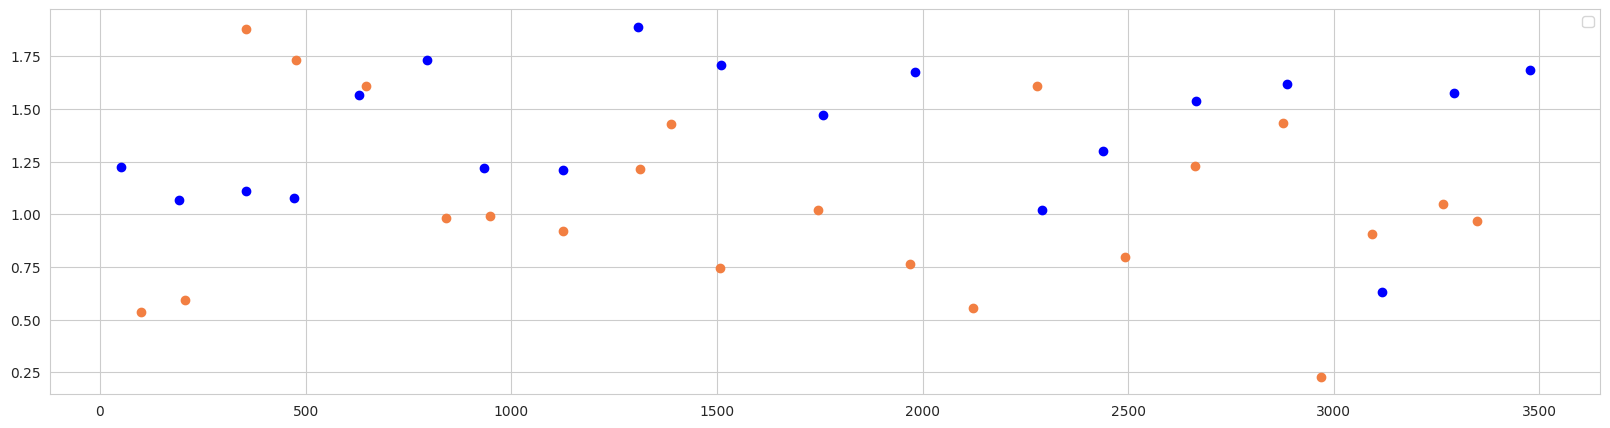

In [34]:
import matplotlib.pyplot as plt
from respiration.analysis import (
    find_crossing_points,
    find_crossing_points_nfcp,
    build_cross_curve,
)

from scipy.signal import find_peaks

plt.figure(figsize=(20, 5))
# plt.plot(gt_signal, label='gt', linestyle='--')

# Add crossing points
gt_signal_x = np.diff(gt_signal)

prominence = 0.5
distance = 0.1 * sampling_rate
# distance = None
gt_peaks, _ = find_peaks(gt_signal, prominence=prominence, distance=distance)
plt.scatter(gt_peaks, gt_signal[gt_peaks], color='blue')
print(f'peaks: {(len(gt_peaks) / (len(gt_signal) / sampling_rate)) * 60:.2f} bpm')

# crossing_points, _ = signal.find_peaks(-gt_signal, prominence=1.0)
# plt.scatter(crossing_points, gt_signal[crossing_points], color='blue')
# crossing_points = find_crossing_points(gt_signal_x)
# crossing_points = find_crossing_points_nfcp(gt_signal_x, sampling_rate)
# plt.scatter(crossing_points, gt_signal[crossing_points], color='blue')
# plt.plot(gt_signal_x, label='gt', linestyle='--')

# gt_signal_cross = build_cross_curve(gt_signal, sampling_rate)
# plt.plot(gt_signal_cross, label='gt_cross')

for signal in signals:
    # plt.plot(signal['signal'], label=signal['label'])
    peaks, _ = find_peaks(signal['signal'], prominence=prominence, distance=distance)
    
    random_color = np.random.rand(3,)
    plt.scatter(peaks, signal['signal'][peaks], color=random_color)
    print(f'{signal["label"]}: {(len(peaks) / (len(signal["signal"]) / sampling_rate)) * 60:.2f} bpm')

plt.legend()
plt.show()